In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
    name: str
    age: str
    skills: List[str]
    result: str

In [14]:
def greeting_node(state: AgentState)-> AgentState:
    state['result'] = f"{state['name']}, welcome to the system!"
    return state

def describe_age_node(state: AgentState)-> AgentState:
    state['result'] = state['result'] + f" You are {state['age']} years old!"
    return state

def list_skills_node(state: AgentState)-> AgentState:
    state['result'] = state['result'] + f" You have skills in: {', '.join(state['skills'][:-1])} and {state['skills'][-1]}"
    return state

In [15]:
graph = StateGraph(AgentState)

graph.add_node("greeting_node", greeting_node)
graph.add_node("describe_age_node", describe_age_node)
graph.add_node("list_skills_node", list_skills_node)

graph.add_edge("greeting_node", "describe_age_node")
graph.add_edge("describe_age_node", "list_skills_node")

graph.set_entry_point("greeting_node")
graph.set_finish_point("list_skills_node")

app = graph.compile()

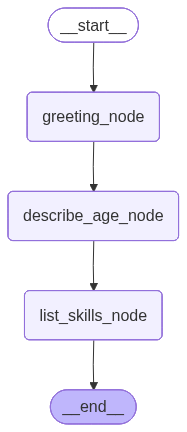

In [16]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [18]:
result = app.invoke({'name': "Kelvin", 'age': "20", 'skills': ["Python", "Machine Learning", "LangGraph"]})
print(result['result'])

Kelvin, welcome to the system! You are 20 years old! You have skills in: Python, Machine Learning and LangGraph
